# Introduction

**Convolution Neural Networks**

Convolutions don't use fully connected layers, but sparsely connected layers, that is, they accept matrices as inputs unlike human beings, who understand images by taking snapshots with the eye.

The layers used in CNNs are called:
- Convolutional layer
- Pooling layer
- Fully connected layer

**Convolutional layer**

The convoloution layer (CONV) uses filters that perform convolution operations while scanning the input image with respect to its dimensions. Its hyperparameters include the filter size, which can be 2x2, 3x3, 4x4, 5x5 (but not restricted to these alone), and stride (S). The resulting output (O) is called the feature map or activation map and has all the features computed using the input layers and filters.

**Pooling layer**

The pooling layer (POOL) is used for downsampling of the features and is typically applied after a convolution layer. The two types of pooling opeartions are called mac and average pooling, where the maximum and average value of the features is taken, respectively.



**Fully connected layer**

The fully connected layer (FC) operates on a flattened input where each input is connected to all the neurons. These are usually used at the end of the network to connect the hidden layers to the output layer, which helps in optimizing the class scores.

**Long Short Term Memory (LSTM)**

LSTMs on the other hand, make smal; modifications to the information by multiplications and additions. With LSTMs, the information flows through a mechanism known as cell states. This way, LSTMs can selectively remember or forget things. The information at a particular cell state has three different dependencies. These dependencies can be generalized to any problem as:
- The previous cell state (i.e. the information that was present in the memory after the previous time step)
- The previous hidden state (i.e. this is the same as the output of the previous cell)
- The input at the current time step (i.e. the new information that is being fed in at that moment)

**Word2Vec Embedding**
Word2Vec was developed at Google by Tomas Mikolov, et al. and uses Neural Networks to learn word embeddings.

The beauty with Word2Vec is that the vectors are learned by understanding the context in which words appear. The result is vectors in which words with similar meanings end up with similar numerical representation.

Word2Vec is composed of two different learning models, CBOW and Skip-Gram. CBOW stands for Continuous Bag of Words model.

Skip-Gram Model is the opposite, learning word embeddings by training a model to predict context given a word.

**Named Entity Recognition**

In Natural language processing, Named Entity Recognition (NER) is a process where a sentence or a chunk of text is parsed through to find entities that can be put under categories like names, organizations, locations, quantities, monetary values, percentages, etc.

# LSTM for Time Series

**Data preparation**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/BTC-USD.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,75979000
1,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,81580096
2,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,83608200
3,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800
4,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400


In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected = True)
%matplotlib inline

In [ ]:
# Using 80% of data for training, 40% for validation
train = df.iloc[0:int(len(df)*0.8), :]
test = df.iloc[int(len(df)*0.8):, :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1169, 293)


In [ ]:
X_train, Y_train = [], []
for i in range(len(train) - 3):
  a = train.iloc[i:(i + 3), 5]
  X_train.append(a)
  Y_train.append(train.iloc[i + 3, 5])
print(len(Y_train))

1166


In [ ]:
 X_test, Y_test = [], []
for i in range(len(test) - 3):
  a = test.iloc[i:(i + 3), 5]
  X_test.append(a)
  Y_test.append(test.iloc[i + 3, 5])
print(len(Y_test))

290


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

## LSTM

**Define Keras Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))

**Compile Keras Model**

In [ ]:
model.compile(loss = 'mae', optimizer = 'adam')

**Fit Keras Model**

In [ ]:
 history = model.fit(X_train, Y_train, epochs=30, batch_size=100, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/30
10/10 - 3s - loss: 5515.4614 - val_loss: 8628.2041
Epoch 2/30
10/10 - 0s - loss: 5304.9980 - val_loss: 8261.3105
Epoch 3/30
10/10 - 0s - loss: 4969.8516 - val_loss: 7623.8481
Epoch 4/30
10/10 - 0s - loss: 4571.6255 - val_loss: 6847.4253
Epoch 5/30
10/10 - 0s - loss: 3994.7808 - val_loss: 5706.8706
Epoch 6/30
10/10 - 0s - loss: 3126.5010 - val_loss: 3913.0986
Epoch 7/30
10/10 - 0s - loss: 1906.9241 - val_loss: 1821.3796
Epoch 8/30
10/10 - 0s - loss: 505.5844 - val_loss: 684.1671
Epoch 9/30
10/10 - 0s - loss: 574.6052 - val_loss: 444.0018
Epoch 10/30
10/10 - 0s - loss: 278.7050 - val_loss: 325.2980
Epoch 11/30
10/10 - 0s - loss: 251.6669 - val_loss: 285.4602
Epoch 12/30
10/10 - 0s - loss: 252.0031 - val_loss: 248.4338
Epoch 13/30
10/10 - 0s - loss: 246.3231 - val_loss: 268.9189
Epoch 14/30
10/10 - 0s - loss: 256.3170 - val_loss: 247.4429
Epoch 15/30
10/10 - 0s - loss: 245.4858 - val_loss: 266.9449
Epoch 16/30
10/10 - 0s - loss: 255.7594 - val_loss: 246.9190
Epoch 17/30
10/10 -

**Evaluate Keras Model**

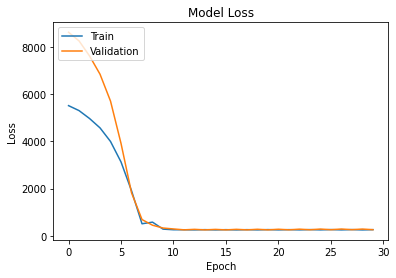

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

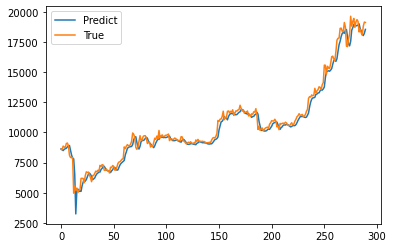

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_pred, label = 'Predict')
plt.plot(Y_test, label = 'True')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_pred, Y_test)

0.9774448219933018

# CNN & LSTM for sentiment analysis

**Data Preparation**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/bitcointweets.csv')

In [ ]:
data.head()

,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['neutral']
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


In [ ]:
data.columns = ['data', 'text', 'author', 'id', 'unknown', 'tags', 'url', 'sentiment']

In [ ]:
data.head()

,data,text,author,id,unknown,tags,url,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


In [ ]:
data.drop(columns=['unknown'], axis = 1, inplace = True)

In [ ]:
data.head()

,data,text,author,id,tags,url,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



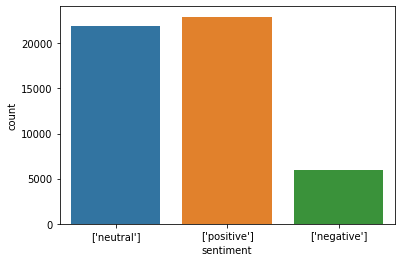

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(data['sentiment'])

In [ ]:
# Text length
data['text_length'] = data['text'].apply(len)

In [ ]:
data.head()

,data,text,author,id,tags,url,sentiment,text_length
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],137
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],34
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],146
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],138


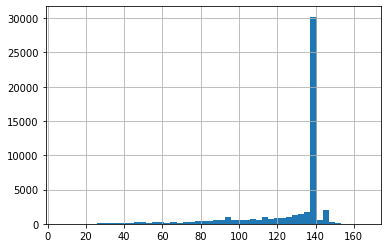

In [ ]:
data['text_length'].hist(bins=50)

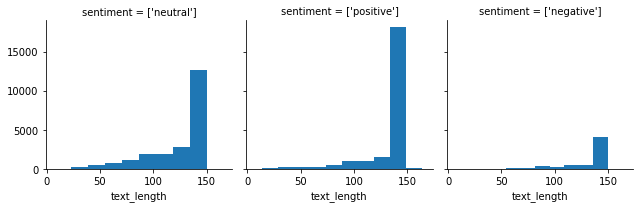

In [ ]:
g = sns.FacetGrid(data, col = 'sentiment')
g.map(plt.hist, 'text_length')

In [ ]:
X = data['text']
y = pd.get_dummies(data['sentiment']).values
num_classes = data['sentiment'].nunique()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(40686,) (10172,) (40686, 3) (10172, 3)


**Tokenization**

In [ ]:
# Tokenize Text
from keras.preprocessing.text import Tokenizer
max_features = 20000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

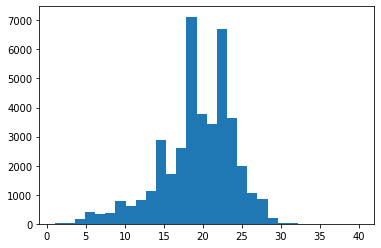

In [ ]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords, bins = 30)
plt.show()

In [ ]:
from keras.preprocessing import sequence
max_words = 150
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)
print(X_train.shape, X_test.shape)

(40686, 150) (10172, 150)


## CNN + LSTM

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Define Keras Model**

In [ ]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 150, input_length=X_train.shape[1]))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters = 32, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

**Compile Keras Model**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit Keras Model**

In [ ]:
model_history = model.fit(X_train, Y_train, epochs = 5, batch_size = 128, verbose = 2, validation_split=0.2)

Epoch 1/5
255/255 - 71s - loss: 0.3518 - accuracy: 0.8525 - val_loss: 0.1129 - val_accuracy: 0.9642
Epoch 2/5
255/255 - 67s - loss: 0.0550 - accuracy: 0.9837 - val_loss: 0.1061 - val_accuracy: 0.9678
Epoch 3/5
255/255 - 68s - loss: 0.0214 - accuracy: 0.9939 - val_loss: 0.1104 - val_accuracy: 0.9705
Epoch 4/5
255/255 - 68s - loss: 0.0097 - accuracy: 0.9974 - val_loss: 0.1195 - val_accuracy: 0.9706
Epoch 5/5
255/255 - 68s - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.1447 - val_accuracy: 0.9669


In [ ]:
model.save('/content/drive/MyDrive/cnnlstmmodel')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/cnnlstmmodel/assets


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/cnnlstmmodel')

In [ ]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



**Evaluate Keras Model**

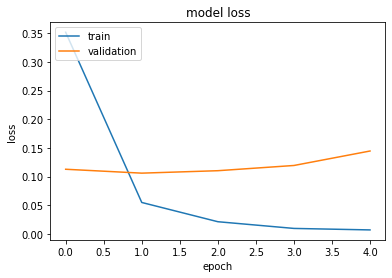

In [ ]:
# "Loss"
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

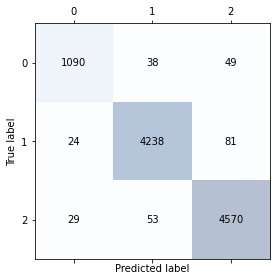

In [ ]:
confmat = confusion_matrix(np.argmax(Y_test, axis = 1), y_pred)

fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x = j, y = i, s = confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_test, axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1177
           1       0.98      0.98      0.98      4343
           2       0.97      0.98      0.98      4652

    accuracy                           0.97     10172
   macro avg       0.97      0.96      0.96     10172
weighted avg       0.97      0.97      0.97     10172



# Word2Vec

**Corpus Preparation**

In [ ]:
texts = data['text']
matrix = []
for sentence in texts:
  words = sentence.split(" ")
  matrix.append(words)

In [ ]:
matrix

[['@lopp',
  '@_Kevin_Pham',
  '@psycho_sage',
  '@naval',
  'But',
  '@ProfFaustus',
  '(dum',
  'b',
  'a',
  'ss)',
  'said',
  'you',
  'know',
  'nothing',
  'about',
  '#Bitcoin',
  '...',
  '😂😂😂',
  'https://t.co/SBAMFQ2Yiy'],
 ['RT',
  '@tippereconomy:',
  'Another',
  'use',
  'case',
  'for',
  '#blockchain',
  'and',
  '#Tipper.',
  'The',
  '#TipperEconomy',
  '',
  'can',
  'unseat',
  'Facebook',
  'and',
  'change',
  'everything!',
  'ICO',
  'Live',
  'No…'],
 ['free', 'coins', 'https://t.co/DiuoePJdap'],
 ['RT',
  '@payvxofficial:',
  'WE',
  'are',
  'happy',
  'to',
  'announce',
  'that',
  'PayVX',
  'Presale',
  'Phase',
  '1',
  'is',
  'now',
  'LIVE!\n\nSign',
  'up',
  '--&gt;&gt;',
  'https://t.co/dhprzsSxek\nCurrencies',
  'accept…'],
 ['Copy',
  'successful',
  'traders',
  'automatically',
  'with',
  'Bitcoin!',
  '💰💰\n\nI',
  'copy',
  '"Dividend667".',
  'Do',
  'you?\n\n➡️',
  'https://t.co/qb2NXPknVt…',
  'https://t.co/Q43fKQRYzx'],
 ['RT',
  '@bethe

## W2V Model

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Train model
model = Word2Vec(matrix, size = 150, min_count = 1, window = 5, workers = 4)

In [ ]:
# Fit a second PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [ ]:
model.wv

## Metadata and vectors saving

In [ ]:
import io
# Vector file, `\t` separated the vectors and `\n` separate the words
out_v = io.open('/content/drive/MyDrive/vecs.tsv', 'w', encoding = 'utf-8')

# Meta data file, `\n` separated word
out_m = io.open('/content/drive/MyDrive/meta.tsv', 'w', encoding = 'utf-8')

# Write meta file and vector file
for index in range(len(model.wv.index2word)):
  word = model.wv.index2word[index]
  vec = model.wv[word]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

## Named Entity Recognition

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
doc = nlp(data['text'][0])
print([(X.text, X.label_) for X in doc.ents])

[('@_Kevin_Pham', 'ORG'), ('about #Bitcoin', 'MONEY')]


In [ ]:
displacy.render(nlp(data['text'][50]), jupyter=True, style='ent')

In [ ]:
displacy.render(nlp(str(data['text'][50])), style='dep', jupyter=True, options={'distance': 120})